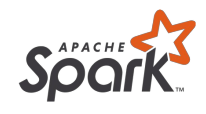

<h1><center>Introduction to PySpark</center></h1>

<a id='objective'></a>
## Objective
The objective of this notebook is to:
><li>Give a proper understanding about the different PySpark functions. </li>
><li>A short introduction to the Spark MLLib. </li>

## PySpark links and docu
* [Official PySpark Docu](https://spark.apache.org/docs/latest/api/python/index.html)
*[ML-Lib Docu and API](https://spark.apache.org/docs/latest/ml-guide.html)

## Recall Spark Key-Features

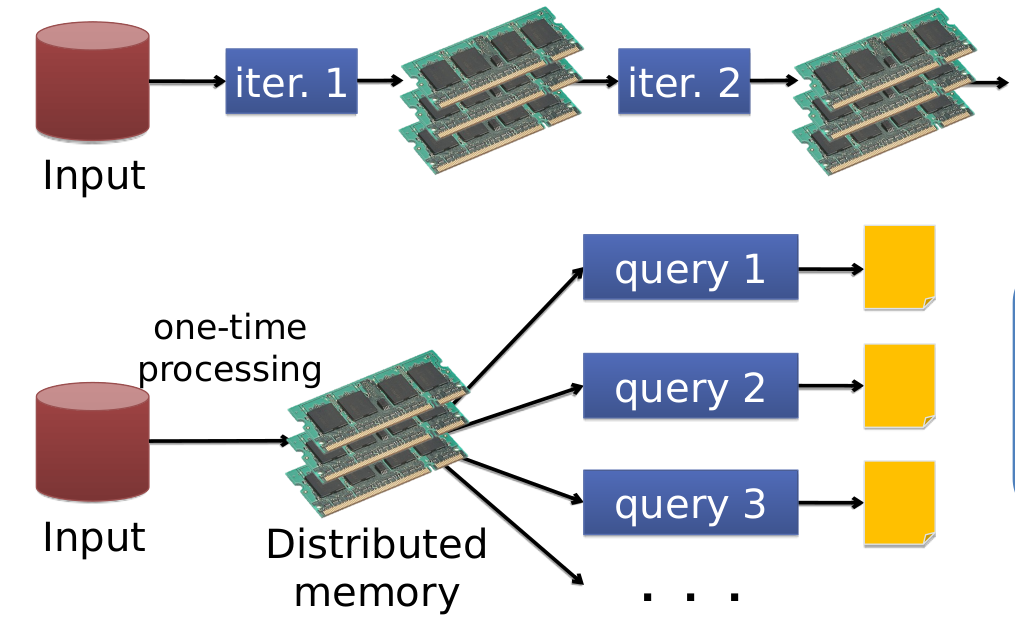

<a id='installing-spark'></a>
## Installing Spark

Install Dependencies:


1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)

> If you have issues with spark version, please upgrade to the latest version from [here](https://archive.apache.org/dist/spark/).

In [6]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

### Set Environment Variables:

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

### Init a local Spark Instance

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

<a id='exploring-the-dataset'></a>
## Exploring an Example the Dataset

<a id='loading-the-dataset'></a>
### Loading the Dataset

In [77]:
# Downloading and preprocessing Cars Data downloaded origianlly from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets
!wget https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv

--2025-04-24 05:32:15--  https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobceles.github.io (jacobceles.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobceles.github.io (jacobceles.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv [following]
--2025-04-24 05:32:15--  https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobcelestine.com (jacobcelestine.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobcelestine.com (jacobcelestine.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22608 (22K) [text/csv]
Saving to: ‘cars.csv.1’

cars.csv.1          100%[===================>]  22.08K  --.-KB/s    in 0.001s  

2025-04-24 05:32:15 (16.8 MB/s) - ‘cars.csv.1’ saved [22608/22608]



In [78]:
!ls

cars.csv    rfc2	sample_data
cars.csv.1  rfc_model	spark-3.5.1-bin-hadoop3
rfc	    rfc_model2	spark-3.5.1-bin-hadoop3.tgz


In [79]:
# Load data from csv to a dataframe.
# header=True means the first row is a header
# sep=';' means the column are seperated using ''
df = spark.read.csv('cars.csv', header=True, sep=";")
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



The above command loads our data from into a dataframe (DF). A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

<a id='viewing-the-dataframe'></a>
### Viewing the Dataframe

There are a couple of ways to view your dataframe(DF) in PySpark:

1.   `df.take(5)` will return a list of five Row objects.
2.   `df.collect()` will get all of the data from the entire DataFrame. Be really careful when using it, because if you have a large data set, you can easily crash the driver node.
3.   `df.show()` is the most commonly used method to view a dataframe. There are a few parameters we can pass to this method, like the number of rows and truncaiton. For example, `df.show(5, False)` or ` df.show(5, truncate=False)` will show the entire data wihtout any truncation.
4.   `df.limit(5)` will **return a new DataFrame** by taking the first n rows. As spark is distributed in nature, there is no guarantee that `df.limit()` will give you the same results each time.

Let us see some of them in action below:

In [80]:
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [81]:
df.limit(5)

Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
Chevrolet Chevell...,18.0,8,307.0,130.0,3504.,12.0,70,US
Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


<a id='viewing-dataframe-columns'></a>
### Viewing Dataframe Columns

In [82]:
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

<a id='dataframe-schema'></a>
### Dataframe Schema

There are two methods commonly used to view the data types of a dataframe:

In [83]:
df.dtypes

[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

In [84]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



<a id='implicit-schema-inference'></a>
#### Inferring Schema Implicitly

We can use the parameter `inferschema=true` to infer the input schema automatically while loading the data. An example is shown below:

In [85]:
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: decimal(4,0) (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



As you can see, the datatype has been infered automatically spark with even the correct precison for decimal type. A problem that might arise here is that sometimes, when you have to read multiple files with different schemas in different files, there might be an issue with implicit inferring leading to null values in some columns. Therefore, let us also see how to define schemas explicitly.

<a id='explicit-schema-inference'></a>
#### Defining Schema Explicitly

In [86]:
from pyspark.sql.types import *
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [87]:
# Creating a list of the schema in the format column_name, data_type
labels = [
     ('Car',StringType()),
     ('MPG',DoubleType()),
     ('Cylinders',IntegerType()),
     ('Displacement',DoubleType()),
     ('Horsepower',DoubleType()),
     ('Weight',DoubleType()),
     ('Acceleration',DoubleType()),
     ('Model',IntegerType()),
     ('Origin',StringType())
]

In [88]:
# Creating the schema that will be passed when reading the csv
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('Car', StringType(), True), StructField('MPG', DoubleType(), True), StructField('Cylinders', IntegerType(), True), StructField('Displacement', DoubleType(), True), StructField('Horsepower', DoubleType(), True), StructField('Weight', DoubleType(), True), StructField('Acceleration', DoubleType(), True), StructField('Model', IntegerType(), True), StructField('Origin', StringType(), True)])

In [89]:
df = spark.read.csv('cars.csv', header=True, sep=";", schema=schema)
df.printSchema()
# The schema comes as we gave!

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [90]:
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |
|Ford Torino                     |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |
|Ford Galaxie 500                |15.0|8        |429.0       |198.0     |4341.0|10.0        |70   |US    |
|Chevrolet Impala                |14.

As we can see here, the data has been successully loaded with the specified datatypes.

<a id='dataframe-operations-on-columns'></a>
## DataFrame Operations on Columns

We will go over the following in this section:

1.   Selecting Columns
2.   Selecting Multiple Columns
3.   Adding New Columns
4.   Renaming Columns
5.   Grouping By Columns
6.   Removing Columns



<a id='selecting-columns'></a>
### Selecting Columns

There are multiple ways to do a select in PySpark. You can find how they differ and how each below:

In [24]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car)
print("*"*20)
df.select(df.Car).show(truncate=False)

Column<'Car'>
********************
+--------------------------------+
|Car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



**NOTE:**

> **We can't always use the dot notation because this will break when the column names have reserved names or attributes to the data frame class. Additionally, the column names are case sensitive in nature so we need to always make sure the column names have been changed to a paticular case before using it.**



In [25]:
# 2nd method
# Column name is case insensitive here
print(df['car'])
print("*"*20)
df.select(df['car']).show(truncate=False)

Column<'car'>
********************
+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [26]:
# 3rd method
# Column name is case insensitive here
from pyspark.sql.functions import col
df.select(col('car')).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



<a id='selecting-multiple-columns'></a>
### Selecting Multiple Columns

In [27]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car, df.Cylinders)
print("*"*40)
df.select(df.Car, df.Cylinders).show(truncate=False)

Column<'Car'> Column<'Cylinders'>
****************************************
+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [28]:
# 2nd method
# Column name is case insensitive in this usage
print(df['car'],df['cylinders'])
print("*"*40)
df.select(df['car'],df['cylinders']).show(truncate=False)

Column<'car'> Column<'cylinders'>
****************************************
+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [29]:
# 3rd method
# Column name is case insensitive in this usage
from pyspark.sql.functions import col
df.select(col('car'),col('cylinders')).show(truncate=False)

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet Monte Carlo           |8        |
|Buick Est

<a id='adding-new-columns'></a>
### Adding New Columns

We will take a look at three cases here:

1.   Adding a new column
2.   Adding multiple columns
3.   Deriving a new column from an exisitng one

In [30]:
# CASE 1: Adding a new column
# We will add a new column called 'first_column' at the end
from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(1))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [31]:
# CASE 2: Adding multiple columns
# We will add two new columns called 'second_column' and 'third_column' at the end
df = df.withColumn('second_column', lit(2)) \
       .withColumn('third_column', lit('Third Column'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |2            |Third Column|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |2            |Third Column|
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |2            |Third Column|
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |2            |Third Column|
|Ford Torino        

In [32]:
# CASE 3: Deriving a new column from an exisitng one
# We will add a new column called 'car_model' which has the value of car and model appended together with a space in between
from pyspark.sql.functions import concat
df = df.withColumn('car_model', concat(col("Car"), lit(" "), col("model")))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |2            |Third Column|Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |2            |Third Column|Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |2            |Third Column|Plymouth Satelli

As we can see, the new column car model has been created from existing columns. Since our aim was to create a column which has the value of car and model appended together with a space in between we have used the `concat` operator.

<a id='renaming-columns'></a>
### Renaming Columns

We use the `withColumnRenamed` function to rename a columm in PySpark. Let us see it in action below:

In [33]:
#Renaming a column in PySpark
df = df.withColumnRenamed('first_column', 'new_column_one') \
       .withColumnRenamed('second_column', 'new_column_two') \
       .withColumnRenamed('third_column', 'new_column_three')
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_one|new_column_two|new_column_three|car_model                          |
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1             |2             |Third Column    |Chevrolet Chevelle Malibu 70       |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1             |2             |Third Column    |Buick Skylark 320 70               |
|Plymouth Satellite              |18.0|8        |3

<a id='grouping-by-columns'></a>
### Grouping By Columns

Here, we see the Dataframe API way of grouping values. We will discuss how to:


1.   Group By a single column
2.   Group By multiple columns

In [34]:
# Group By a column in PySpark
df.groupBy('Origin').count().show(5)

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



In [35]:
# Group By multiple columns in PySpark
df.groupBy('Origin', 'Model').count().show(5)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
|Europe|   71|    5|
|Europe|   80|    9|
|Europe|   79|    4|
| Japan|   75|    4|
|    US|   72|   18|
+------+-----+-----+
only showing top 5 rows



<a id='removing-columns'></a>
### Removing Columns

In [36]:
#Remove columns in PySpark
df = df.drop('new_column_one')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_two|new_column_three|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |2             |Third Column    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |2             |Third Column    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |2             |Third Column    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8 

In [37]:
#Remove multiple columnss in one go
df = df.drop('new_column_two') \
       .drop('new_column_three')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |AMC Rebel SST 70            |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US   

<a id='dataframe-operations-on-rows'></a>
## DataFrame Operations on Rows

We will discuss the follwoing in this section:

1.   Filtering Rows
2. 	 Get Distinct Rows
3.   Sorting Rows
4.   Union Dataframes



<a id='filtering-rows'></a>
### Filtering Rows

In [38]:
# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter(col('Origin')=='Europe').count()
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 73
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

In [39]:
# Filtering rows in PySpark based on Multiple conditions
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter((col('Origin')=='Europe') &
                                  (col('Cylinders')==4)).count() # Two conditions added here
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 66
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

<a id='get-distinct-rows'></a>
### Get Distinct Rows

In [40]:
#Get Unique Rows in PySpark
df.select('Origin').distinct().show()

+------+
|Origin|
+------+
|Europe|
|    US|
| Japan|
+------+



In [41]:
#Get Unique Rows in PySpark based on mutliple columns
df.select('Origin','model').distinct().show()

+------+-----+
|Origin|model|
+------+-----+
|Europe|   71|
|Europe|   80|
|Europe|   79|
| Japan|   75|
|    US|   72|
|    US|   80|
|Europe|   74|
| Japan|   79|
|Europe|   76|
|    US|   75|
| Japan|   77|
|    US|   82|
| Japan|   80|
| Japan|   78|
|    US|   78|
|Europe|   75|
|    US|   71|
|    US|   77|
| Japan|   70|
| Japan|   71|
+------+-----+
only showing top 20 rows



<a id='sorting-rows'></a>
### Sorting Rows

In [42]:
# Sort Rows in PySpark
# By default the data will be sorted in ascending order
df.orderBy('Cylinders').show(truncate=False)

+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Mazda RX2 Coupe             |19.0|3        |70.0        |97.0      |2330.0|13.5        |72   |Japan |Mazda RX2 Coupe 72             |
|Mazda RX3                   |18.0|3        |70.0        |90.0      |2124.0|13.5        |73   |Japan |Mazda RX3 73                   |
|Mazda RX-4                  |21.5|3        |80.0        |110.0     |2720.0|13.5        |77   |Japan |Mazda RX-4 77                  |
|Mazda RX-7 GS               |23.7|3        |70.0        |100.0     |2420.0|12.5        |80   |Japan |Mazda RX-7 GS 80               |
|Datsun 510 (sw)             |28.0|4        |97.0      

In [43]:
# To change the sorting order, you can use the ascending parameter
df.orderBy('Cylinders', ascending=False).show(truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Plymouth 'Cuda 340       |14.0|8        |340.0       |160.0     |3609.0|8.0         |70   |US    |Plymouth 'Cuda 340 70       |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140.0|12.0        |71   |US    |Pontiac Safari (sw) 71      |
|Ford Mustang Boss 302    |0.0 |8        |302.0       |140.0     |3353.0|8.0         |70   |US    |Ford Mustang Boss 302 70    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Chevrolet Monte Carlo    |15.0|8        |400.0       |150.0     |3761.0|9.5         |70   |US   

In [44]:
# Using groupBy aand orderBy together
df.groupBy("Origin").count().orderBy('count', ascending=False).show(10)

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



<a id='union-dataframes'></a>
### Union Dataframes

You will see three main methods for performing union of dataframes. It is important to know the difference between them and which one is preferred:

*   `union()` – It is used to merge two DataFrames of the same structure/schema. If schemas are not the same, it returns an error
*   `unionAll()` – This function is deprecated since Spark 2.0.0, and replaced with union()
*   `unionByName()` - This function is used to merge two dataframes based on column name.

> Since `unionAll()` is deprecated, **`union()` is the preferred method for merging dataframes.**
<br>
> The difference between `unionByName()` and `union()` is that `unionByName()` resolves columns by name, not by position.

In other SQLs, Union eliminates the duplicates but UnionAll merges two datasets, thereby including duplicate records. But, in PySpark, both behave the same and includes duplicate records. The recommendation is to use `distinct()` or `dropDuplicates()` to remove duplicate records.

In [45]:
# CASE 1: Union When columns are in order
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
europe_cars = df.filter((col('Origin')=='Europe') & (col('Cylinders')==5))
japan_cars = df.filter((col('Origin')=='Japan') & (col('Cylinders')==3))
print("EUROPE CARS: "+str(europe_cars.count()))
print("JAPAN CARS: "+str(japan_cars.count()))
print("AFTER UNION: "+str(europe_cars.union(japan_cars).count()))

EUROPE CARS: 3
JAPAN CARS: 4
AFTER UNION: 7


**Result:**

> As you can see here, there were 3 cars from Europe with 5 Cylinders, and 4 cars from Japan with 3 Cylinders. After union, there are 7 cars in total.



In [46]:
# CASE 1: Union When columns are not in order
# Creating two dataframes with jumbled columns
df1 = spark.createDataFrame([[1, 2, 3]], ["col0", "col1", "col2"])
df2 = spark.createDataFrame([[4, 5, 6]], ["col1", "col2", "col0"])
df1.unionByName(df2).show()

+----+----+----+
|col0|col1|col2|
+----+----+----+
|   1|   2|   3|
|   6|   4|   5|
+----+----+----+



**Result:**

> As you can see here, the two dataframes have been successfully merged based on their column names.



<a id='common-data-manipulation-functions'></a>
## Common Data Manipulation Functions

In [47]:
# Functions available in PySpark
from pyspark.sql import functions
# Similar to python, we can use the dir function to view the avaiable functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

<a id='string-functions'></a>
### String Functions

In [48]:
# Loading the data
from pyspark.sql.functions import col
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)

**Display the Car column in exisitng, lower and upper characters, and the first 4 characters of the column**

In [49]:
from pyspark.sql.functions import col,lower, upper, substring
# Prints out the details of a function
help(substring)
# alias is used to rename the column name in the output
df.select(col('Car'),lower(col('Car')),upper(col('Car')),substring(col('Car'),1,4).alias("concatenated value")).show(5, False)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]

+---------------

**Concatenate the Car column and Model column and add a space between them.**

In [50]:
from pyspark.sql.functions import concat
df.select(col("Car"),col("model"),concat(col("Car"), lit(" "), col("model"))).show(5, False)

+-------------------------+-----+----------------------------+
|Car                      |model|concat(Car,  , model)       |
+-------------------------+-----+----------------------------+
|Chevrolet Chevelle Malibu|70   |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |70   |Buick Skylark 320 70        |
|Plymouth Satellite       |70   |Plymouth Satellite 70       |
|AMC Rebel SST            |70   |AMC Rebel SST 70            |
|Ford Torino              |70   |Ford Torino 70              |
+-------------------------+-----+----------------------------+
only showing top 5 rows



<a id='numeric-functions'></a>
### Numeric functions

**Show the oldest date and the most recent date**

In [51]:
from pyspark.sql.functions import min, max
df.select(min(col('Weight')), max(col('Weight'))).show()

+-----------+-----------+
|min(Weight)|max(Weight)|
+-----------+-----------+
|       1613|       5140|
+-----------+-----------+



**Add 10 to the minimum and maximum weight**

In [52]:
from pyspark.sql.functions import min, max, lit
df.select(min(col('Weight'))+lit(10), max(col('Weight')+lit(10))).show()

+------------------+------------------+
|(min(Weight) + 10)|max((Weight + 10))|
+------------------+------------------+
|              1623|              5150|
+------------------+------------------+



<a id='operations-on-date'></a>
### Operations on Date

> [PySpark follows SimpleDateFormat table of Java. Click here to view the docs.](https://docs.oracle.com/javase/7/docs/api/java/text/SimpleDateFormat.html)

In [53]:
from pyspark.sql.functions import to_date, to_timestamp, lit
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df.show()
df.printSchema()

+-------------------+
|                DOB|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+

root
 |-- DOB: string (nullable = true)



In [54]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('DOB'),'yyyy-MM-dd HH:mm:ss'))
df.show()
df.printSchema()

+---------------------------------+--------------------------------------+
|to_date(DOB, yyyy-MM-dd HH:mm:ss)|to_timestamp(DOB, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2019-12-25|                   2019-12-25 13:30:00|
+---------------------------------+--------------------------------------+

root
 |-- to_date(DOB, yyyy-MM-dd HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, yyyy-MM-dd HH:mm:ss): timestamp (nullable = true)



In [55]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('DOB'),'dd/MMM/yyyy HH:mm:ss'))
df.show()
df.printSchema()

+----------------------------------+---------------------------------------+
|to_date(DOB, dd/MMM/yyyy HH:mm:ss)|to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2019-12-25|                    2019-12-25 13:30:00|
+----------------------------------+---------------------------------------+

root
 |-- to_date(DOB, dd/MMM/yyyy HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss): timestamp (nullable = true)



**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [56]:
from pyspark.sql.functions import date_add, date_sub
# create a dummy dataframe
df = spark.createDataFrame([('1990-01-01',),('1995-01-03',),('2021-03-30',)], ['Date'])
# find out the required dates
df.select(date_add(max(col('Date')),3), date_sub(min(col('Date')),3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2021-04-02|            1989-12-29|
+----------------------+----------------------+



<a id='joins-in-pyspark'></a>
## Joins in PySpark

In [57]:
# Create two dataframes
cars_df = spark.createDataFrame([[1, 'Car A'],[2, 'Car B'],[3, 'Car C']], ["id", "car_name"])
car_price_df = spark.createDataFrame([[1, 1000],[2, 2000],[3, 3000]], ["id", "car_price"])
cars_df.show()
car_price_df.show()

+---+--------+
| id|car_name|
+---+--------+
|  1|   Car A|
|  2|   Car B|
|  3|   Car C|
+---+--------+

+---+---------+
| id|car_price|
+---+---------+
|  1|     1000|
|  2|     2000|
|  3|     3000|
+---+---------+



In [58]:
# Executing an inner join so we can see the id, name and price of each car in one row
cars_df.join(car_price_df, cars_df.id == car_price_df.id, 'inner').select(cars_df['id'],cars_df['car_name'],car_price_df['car_price']).show(truncate=False)

+---+--------+---------+
|id |car_name|car_price|
+---+--------+---------+
|1  |Car A   |1000     |
|2  |Car B   |2000     |
|3  |Car C   |3000     |
+---+--------+---------+



As you can see, we have done an inner join between two dataframes. The following joins are supported by PySpark:
1. inner (default)
2. cross
3. outer
4. full
5. full_outer
6. left
7. left_outer
8. right
9. right_outer
10. left_semi
11. left_anti

<a id='spark-sql'></a>
## Spark SQL

SQL has been around since the 1970s, and so one can imagine the number of people who made it their bread and butter. As big data came into popularity, the number of professionals with the technical knowledge to deal with it was in shortage. This led to the creation of Spark SQL. To quote the docs:<br>
>Spark SQL is a Spark module for structured data processing. Unlike the basic Spark RDD API, the interfaces provided by Spark SQL provide Spark with more information about the structure of both the data and the computation being performed. Internally, Spark SQL uses this extra information to perform extra optimizations.

Basically, what you need to know is that Spark SQL is used to execute SQL queries on big data. Spark SQL can also be used to read data from Hive tables and views. Let me explain Spark SQL with an example.


In [59]:
# Load data
df = spark.read.csv('cars.csv', header=True, sep=";")
# Register Temporary Table
df.createOrReplaceTempView("temp")
# Select all data from temp table
spark.sql("select * from temp limit 5").show()
# Select count of data in table
spark.sql("select count(*) as total_count from temp").show()

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+

+-----------+
|total_count|
+-----------+
|        406|
+-----------+



As you can see, we registered the dataframe as temporary table and then ran basic SQL queries on it. How amazing is that?!<br>
If you are a person who is more comfortable with SQL, then this feature is truly a blessing for you! But this raises a question:
> *Should I just keep using Spark SQL all the time?*

And the answer is, _**it depends**_.<br>
So basically, the different functions acts in differnet ways, and depending upon the type of action you are trying to do, the speed at which it completes execution also differs. But as time progress, this feature is getting better and better, so hopefully the difference should be a small margin. There are plenty of analysis done on this, but nothing has a definite answer yet. You can read this [comparative study done by horton works](https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547) or the answer to this [stackoverflow question](https://stackoverflow.com/questions/45430816/writing-sql-vs-using-dataframe-apis-in-spark-sql) if you are still curious about it.

<a id='rdd'></a>
## RDD

> With map, you define a function and then apply it record by record. Flatmap returns a new RDD by first applying a function to all of the elements in RDDs and then flattening the result. Filter, returns a new RDD. Meaning only the elements that satisfy a condition. With reduce, we are taking neighboring elements and producing a single combined result.
For example, let's say you have a set of numbers. You can reduce this to its sum by providing a function that takes as input two values and reduces them to one.

Some of the reasons you would use a dataframe over RDD are:
1.   It's ability to represnt data as rows and columns. But this also means it can only hold structred and semi-structured data.
2.   It allows processing data in different formats (AVRO, CSV, JSON, and storage system HDFS, HIVE tables, MySQL).
3. It's superior job Optimization capability.
4. DataFrame API is very easy to use.





In [60]:
cars = spark.sparkContext.textFile('cars.csv')
print(cars.first())
cars_header = cars.first()
cars_rest = cars.filter(lambda line: line!=cars_header)
print(cars_rest.first())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US


**How many cars are there in our csv data?**

In [61]:
cars_rest.map(lambda line: line.split(";")).count()

406

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in Europe**

In [62]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8]=='Europe').
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Volkswagen Type 3', '23.0', '4', '2254.', 'Europe'),
 ('Volvo 145e (sw)', '18.0', '4', '2933.', 'Europe'),
 ('Volkswagen 411 (sw)', '22.0', '4', '2511.', 'Europe'),
 ('Peugeot 504 (sw)', '21.0', '4', '2979.', 'Europe'),
 ('Renault 12 (sw)', '26.0', '4', '2189.', 'Europe'),
 ('Volkswagen Super Beetle', '26.0', '4', '1950.', 'Europe'),
 ('Fiat 124 Sport Coupe', '26.0', '4', '2265.', 'Europe'),
 ('Fiat 128', '29

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in either Europe or Japan**

In [63]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8] in ['Europe','Japan']).
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Toyota Corolla Mark ii', '24.0', '4', '2372.', 'Japan'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Toyota Corolla', '25.0', '4', '2228.', 'Japan'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Toyota Corolla 1200', '31.0', '4', '1773.', 'Japan'),
 ('Datsun 1200', '35.0', '4', '1613.', 'Japan'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Toyota Corolla Hardtop', '24.0', '4', '2278.', 'Japan'),
 ('Volkswagen Type 3', '23.0', '4', '

<a id='user-defined-functions-udf'></a>
## User-Defined Functions (UDF)

PySpark User-Defined Functions (UDFs) help you convert your python code into a scalable version of itself. It comes in handy more than you can imagine, but beware, as the performance is less when you compare it with pyspark functions. You can view examples of how UDF works [here](https://docs.databricks.com/spark/latest/spark-sql/udf-python.html). What I will give in this section is some theory on how it works, and why it is slower.

When you try to run a UDF in PySpark, each executor creates a python process. Data will be serialised and deserialised between each executor and python. This leads to lots of performance impact and overhead on spark jobs, making it less efficent than using spark dataframes. Apart from this, sometimes you might have memory issues while using UDFs. The Python worker consumes huge off-heap memory and so it often leads to memoryOverhead, thereby failing your job. Keeping these in mind, I wouldn't recommend using them, but at the end of the day, your choice.

<a id='common-questions'></a>
# Common Questions

<a id='submitting-a-spark-job'></a>
## Submitting a Spark Job

The python syntax for running jobs is: `python <file_name>.py <arg1> <arg2> ...`
<br>But when you submit a spark job you have to use spark-submit to run the application.

Here is a simple example of a spark-submit command:
`spark-submit filename.py --named_argument 'arguemnt value'`<br>
Here, named_argument is an argument that you are reading from inside your script.

There are other options you can pass in the command, like:<br>
`--py-files` which helps you pass a python file to read in your file,<br>
`--files` which helps pass other files like txt or config,<br>
`--deploy-mode` which tells wether to deploy your worker node on cluster or locally <br>
`--conf` which helps pass different configurations, like memoryOverhead, dynamicAllocation etc.

There is an [entire page](https://spark.apache.org/docs/latest/submitting-applications.html) in spark documentation dedicated to this. I highly recommend you go through it once.

<a id='creating-dataframes'></a>
## Creating Dataframes

When getting started with dataframes, the most common question is: *'How do I create a dataframe?'* <br>
Below, you can see how to create three kinds of dataframes:

### Create a totally empty dataframe

In [64]:
from pyspark.sql.types import StructType
sc = spark.sparkContext
#Create empty df
schema = StructType([])
empty = spark.createDataFrame(sc.emptyRDD(), schema)
empty.show()

++
||
++
++



### Create an empty dataframe with header

In [65]:
from pyspark.sql.types import StructType, StructField
#Create empty df with header
schema_header = StructType([StructField("name", StringType(), True)])
empty_with_header = spark.createDataFrame(sc.emptyRDD(), schema_header)
empty_with_header.show()

+----+
|name|
+----+
+----+



### Create a dataframe with header and data

In [66]:
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":13},
  {"name":'Jacob',"age":24},
  {"name":'Betty',"age":135},
]
spark.createDataFrame(Row(**x) for x in mylist).show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



In [67]:
# You can achieve the same using this - note that we are using spark context here, not a spark session
from pyspark.sql import Row
df = sc.parallelize([
        Row(name='Alice', age=13),
        Row(name='Jacob', age=24),
        Row(name='Betty', age=135)]).toDF()
df.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



<a id='drop-duplicates'></a>
## Drop Duplicates

As mentioned earlier, there are two easy to remove duplicates from a dataframe. We have already seen the usage of distinct under <a href="#get-distinct-rows">Get Distinct Rows</a>  section.
I will expalin how to use the `dropDuplicates()` function to achieve the same.

> `drop_duplicates()` is an alias for `dropDuplicates()`

In [68]:
from pyspark.sql import Row
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":5,"height":80},
  {"name":'Jacob',"age":24,"height":80},
  {"name":'Alice',"age":5,"height":80}
]
df = spark.createDataFrame(Row(**x) for x in mylist)
df.dropDuplicates().show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
|Jacob| 24|    80|
+-----+---+------+



`dropDuplicates()` can also take in an optional parameter called *subset* which helps specify the columns on which the duplicate check needs to be done on.

In [69]:
df.dropDuplicates(subset=['height']).show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
+-----+---+------+



## Spark ML-Lib
* [Docu + API](https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html)
* [ML-Lib Guide](https://spark.apache.org/docs/latest/ml-guide.html)

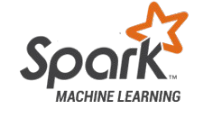

### Simple RandomForest Example

In [76]:
import numpy
from numpy import allclose
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import RandomForestClassificationModel

df = spark.createDataFrame([
    (1.0, Vectors.dense(1.0)),
    (0.0, Vectors.sparse(1, [], []))], ["label", "features"])
stringIndexer = StringIndexer(inputCol="label", outputCol="indexed")
si_model = stringIndexer.fit(df)
td = si_model.transform(df)

rf = RandomForestClassifier(numTrees=3, maxDepth=2, labelCol="indexed", seed=42,
    leafCol="leafId")
rf.getMinWeightFractionPerNode()

model = rf.fit(td)
model.getLabelCol()

model.setFeaturesCol("features")

model.setRawPredictionCol("newRawPrediction")

model.getBootstrap()

model.getRawPredictionCol()

model.featureImportances

allclose(model.treeWeights, [1.0, 1.0, 1.0])

test0 = spark.createDataFrame([(Vectors.dense(-1.0),)], ["features"])
model.predict(test0.head().features)

model.predictRaw(test0.head().features)

model.predictProbability(test0.head().features)

result = model.transform(test0).head()
result.prediction

numpy.argmax(result.probability)

numpy.argmax(result.newRawPrediction)

result.leafId

test1 = spark.createDataFrame([(Vectors.sparse(1, [0], [1.0]),)], ["features"])
model.transform(test1).head().prediction

model.trees

rfc_path =  "rfc2"
rf.save(rfc_path)
rf2 = RandomForestClassifier.load(rfc_path)
rf2.getNumTrees()

model_path = "rfc_model2"
model.save(model_path)
model2 = RandomForestClassificationModel.load(model_path)
model.featureImportances == model2.featureImportances

model.transform(test0).take(1) == model2.transform(test0).take(1)


True

# Assignment: build a simple Classifier in Spark-ML


## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Task
* read the data intio a Spark DF
* Split the data into a train and a test set (80:20)
* setup a train pipeline
* use any supported classifier you like
* evalaute the test F1 score


In [92]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 126 (delta 11), reused 39 (delta 11), pack-reused 87 (from 1)
Receiving objects: 100% (126/126), 185.56 MiB | 18.52 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (86/86), done.


In [93]:
!unzip DATA/creditcard.csv.zip

Archive:  DATA/creditcard.csv.zip
  inflating: creditcard.csv          


In [95]:
df = spark.read.csv('creditcard.csv', header=True, sep=",")
df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     